## Capstone Project

***

## Project Description

Inu + Neko is a company you’ve seen a lot in this course. As a reminder, they are a pet supply and services company that just started an e-commerce business. You have been asked to help them analyze their data to help them make better decisions in the future. 

Inu + Neko had a lot of success with a marketing campaign and is seeing a lot of growth. The company wants to know how these new incoming customers differ from their past customers. Are there different items they should stock more of? Are there other things they should consider?

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero
from numpy import median
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("inu_neko_orderline_clean.csv", parse_dates=["date"], dayfirst=True)

In [3]:
df

,trans_id,prod_upc,cust_id,trans_timestamp,trans_year,trans_month,trans_day,date,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,total_sales
0,10300097,719638000000.00,1001019,35:21.4,2021,1,1,2021-01-01,1,1,20,New York,72.99,Cat Cave,bedding,cat,72.99
1,10300093,73201504044.00,1001015,33:37.5,2021,1,1,2021-01-01,1,1,34,New York,18.95,Purrfect Puree,treat,cat,18.95
2,10300093,719638000000.00,1001015,33:37.5,2021,1,1,2021-01-01,1,1,34,New York,72.99,Cat Cave,bedding,cat,72.99
3,10300093,441531000000.00,1001015,33:37.5,2021,1,1,2021-01-01,1,2,34,New York,28.45,Ball and String,toy,cat,56.90
4,10300093,733427000000.00,1001015,33:37.5,2021,1,1,2021-01-01,1,1,34,New York,18.95,Yum Fish-Dish,food,cat,18.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38218,10327860,287664000000.00,1022098,37:12.8,2021,6,30,2021-06-30,30,1,25,New York,9.95,All Veggie Yummies,treat,dog,9.95
38219,10327960,140160000000.00,1022157,45:09.9,2021,6,30,2021-06-30,30,2,31,Pennsylvania,48.95,Snoozer Essentails,bedding,dog,97.90
38220,10328009,425361000000.00,1022189,57:44.3,2021,6,30,2021-06-30,30,2,53,New Jersey,15.99,Snack-em Fish,treat,cat,31.98
38221,10328089,733427000000.00,1022236,59:29.8,2021,6,30,2021-06-30,30,1,23,Tennessee,18.95,Yum Fish-Dish,food,cat,18.95


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38223 entries, 0 to 38222
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   trans_id          38223 non-null  int64         
 1   prod_upc          38223 non-null  float64       
 2   cust_id           38223 non-null  int64         
 3   trans_timestamp   38223 non-null  object        
 4   trans_year        38223 non-null  int64         
 5   trans_month       38223 non-null  int64         
 6   trans_day         38223 non-null  int64         
 7   date              38223 non-null  datetime64[ns]
 8   trans_hour        38223 non-null  int64         
 9   trans_quantity    38223 non-null  int64         
 10  cust_age          38223 non-null  int64         
 11  cust_state        38223 non-null  object        
 12  prod_price        38223 non-null  float64       
 13  prod_title        38223 non-null  object        
 14  prod_category     3822

In [5]:
df.describe(include='all')

,trans_id,prod_upc,cust_id,trans_timestamp,trans_year,trans_month,trans_day,date,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,total_sales
count,38223.00,38223.00,38223.00,38223,38223.00,38223.00,38223.00,38223,38223.00,38223.00,38223.00,38223,38223.00,38223,38223,38223,38223.00
unique,NaN,NaN,NaN,19316,NaN,NaN,NaN,181,NaN,NaN,NaN,51,NaN,21,4,2,NaN
top,NaN,NaN,NaN,03:54.0,NaN,NaN,NaN,2021-06-30 00:00:00,NaN,NaN,NaN,New York,NaN,Reddy Beddy,treat,cat,NaN
freq,NaN,NaN,NaN,11,NaN,NaN,NaN,503,NaN,NaN,NaN,10486,NaN,4734,11246,21944,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10314072.68,500428846525.89,1010657.01,NaN,2021.00,4.61,16.62,NaN,16.62,1.37,30.06,NaN,30.54,NaN,NaN,NaN,42.11
std,8076.08,258627104318.85,6117.27,NaN,0.00,1.39,8.72,NaN,8.72,0.71,6.96,NaN,18.73,NaN,NaN,NaN,36.61
min,10300091.00,73201504044.00,1001012.00,NaN,2021.00,1.00,1.00,NaN,1.00,1.00,18.00,NaN,9.95,NaN,NaN,NaN,9.95
25%,10307072.50,344539000000.00,1005253.50,NaN,2021.00,4.00,9.00,NaN,9.00,1.00,25.00,NaN,18.95,NaN,NaN,NaN,18.95


In [6]:
df.columns

Index(['trans_id', 'prod_upc', 'cust_id', 'trans_timestamp', 'trans_year', 'trans_month', 'trans_day', 'date', 'trans_hour', 'trans_quantity', 'cust_age', 'cust_state', 'prod_price', 'prod_title', 'prod_category', 'prod_animal_type', 'total_sales'], dtype='object')

### Type Change

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38223 entries, 0 to 38222
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   trans_id          38223 non-null  int64         
 1   prod_upc          38223 non-null  float64       
 2   cust_id           38223 non-null  int64         
 3   trans_timestamp   38223 non-null  object        
 4   trans_year        38223 non-null  int64         
 5   trans_month       38223 non-null  int64         
 6   trans_day         38223 non-null  int64         
 7   date              38223 non-null  datetime64[ns]
 8   trans_hour        38223 non-null  int64         
 9   trans_quantity    38223 non-null  int64         
 10  cust_age          38223 non-null  int64         
 11  cust_state        38223 non-null  object        
 12  prod_price        38223 non-null  float64       
 13  prod_title        38223 non-null  object        
 14  prod_category     3822

In [8]:
df["trans_id"] = df["trans_id"].astype('category')

In [9]:
df["prod_upc"] = df["prod_upc"].astype('category')

In [10]:
df["cust_id"] = df["cust_id"].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38223 entries, 0 to 38222
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   trans_id          38223 non-null  category      
 1   prod_upc          38223 non-null  category      
 2   cust_id           38223 non-null  category      
 3   trans_timestamp   38223 non-null  object        
 4   trans_year        38223 non-null  int64         
 5   trans_month       38223 non-null  int64         
 6   trans_day         38223 non-null  int64         
 7   date              38223 non-null  datetime64[ns]
 8   trans_hour        38223 non-null  int64         
 9   trans_quantity    38223 non-null  int64         
 10  cust_age          38223 non-null  int64         
 11  cust_state        38223 non-null  object        
 12  prod_price        38223 non-null  float64       
 13  prod_title        38223 non-null  object        
 14  prod_category     3822

In [12]:
df.describe(include='all')

,trans_id,prod_upc,cust_id,trans_timestamp,trans_year,trans_month,trans_day,date,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,total_sales
count,38223.00,38223.00,38223.00,38223,38223.00,38223.00,38223.00,38223,38223.00,38223.00,38223.00,38223,38223.00,38223,38223,38223,38223.00
unique,28022.00,23.00,21241.00,19316,NaN,NaN,NaN,181,NaN,NaN,NaN,51,NaN,21,4,2,NaN
top,10322343.00,733427000000.00,1005241.00,03:54.0,NaN,NaN,NaN,2021-06-30 00:00:00,NaN,NaN,NaN,New York,NaN,Reddy Beddy,treat,cat,NaN
freq,7.00,3086.00,12.00,11,NaN,NaN,NaN,503,NaN,NaN,NaN,10486,NaN,4734,11246,21944,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2021.00,4.61,16.62,NaN,16.62,1.37,30.06,NaN,30.54,NaN,NaN,NaN,42.11
std,NaN,NaN,NaN,NaN,0.00,1.39,8.72,NaN,8.72,0.71,6.96,NaN,18.73,NaN,NaN,NaN,36.61
min,NaN,NaN,NaN,NaN,2021.00,1.00,1.00,NaN,1.00,1.00,18.00,NaN,9.95,NaN,NaN,NaN,9.95
25%,NaN,NaN,NaN,NaN,2021.00,4.00,9.00,NaN,9.00,1.00,25.00,NaN,18.95,NaN,NaN,NaN,18.95


### Groupby Function

In [13]:
df.groupby(["trans_id"])["total_sales"].sum().head()

trans_id
10300091    24.95
10300092    35.99
10300093   167.79
10300094    10.97
10300095    18.95
Name: total_sales, dtype: float64

In [14]:
d1 = pd.DataFrame(df.groupby(["trans_id"])["total_sales"].sum())

In [15]:
d1.sort_values(by="total_sales")

,total_sales
trans_id,
10303291,9.95
10315621,9.95
10325437,9.95
10318145,9.95
10305120,9.95
...,...
10323074,532.88
10314572,549.69
10316275,553.90


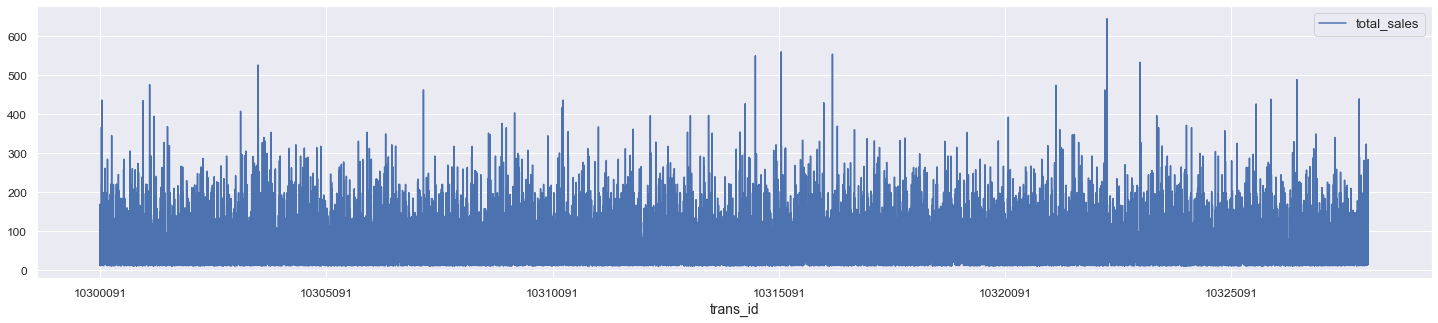

In [16]:
d1.plot(figsize=(25,5))
plt.show()

In [17]:
df.groupby(["prod_upc"])["total_sales"].sum().head()

prod_upc
73201504044.0     46484.35
100469000000.0    58782.90
140160000000.0   100739.10
242314000000.0   209848.20
287664000000.0    22845.20
Name: total_sales, dtype: float64

In [18]:
d2 = pd.DataFrame(df.groupby(["prod_upc"])["total_sales"].sum())

In [19]:
d2.sort_values(by="total_sales")

,total_sales
prod_upc,
483326000000.0,13561.66
287664000000.0,22845.20
845773000000.0,24369.24
425361000000.0,25344.15
621046000000.0,26484.48
374613000000.0,28291.63
904582000000.0,31257.70
575411000000.0,46402.30
73201504044.0,46484.35


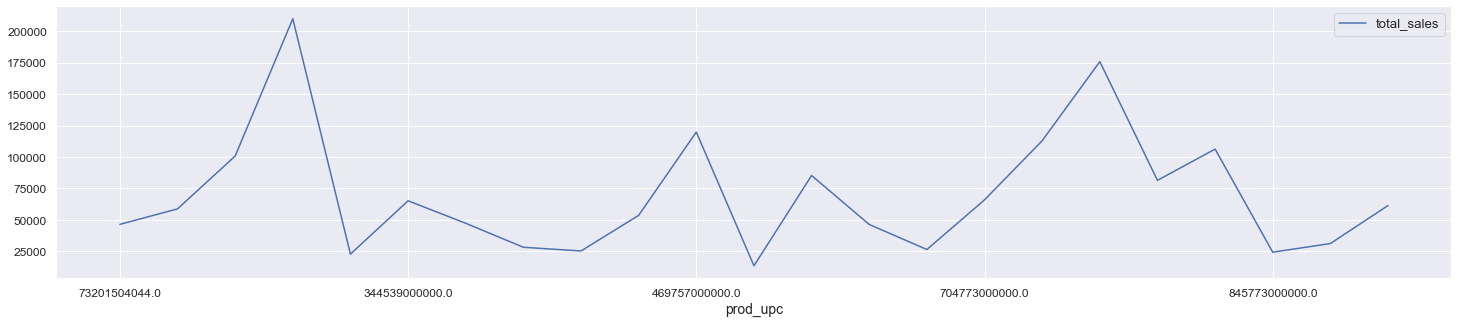

In [20]:
d2.plot(figsize=(25,5))
plt.show()

In [21]:
df.groupby(["cust_id"])["total_sales"].sum().head()

cust_id
1001012    72.80
1001013    60.99
1001014    71.95
1001015   167.79
1001016    70.94
Name: total_sales, dtype: float64

In [22]:
d3 = pd.DataFrame(df.groupby(["cust_id"])["total_sales"].sum())

In [23]:
d3.sort_values(by="total_sales")

,total_sales
cust_id,
1012206,9.95
1018773,9.95
1015854,9.95
1018781,9.95
1018784,9.95
...,...
1007595,611.65
1007511,638.53
1018521,644.86


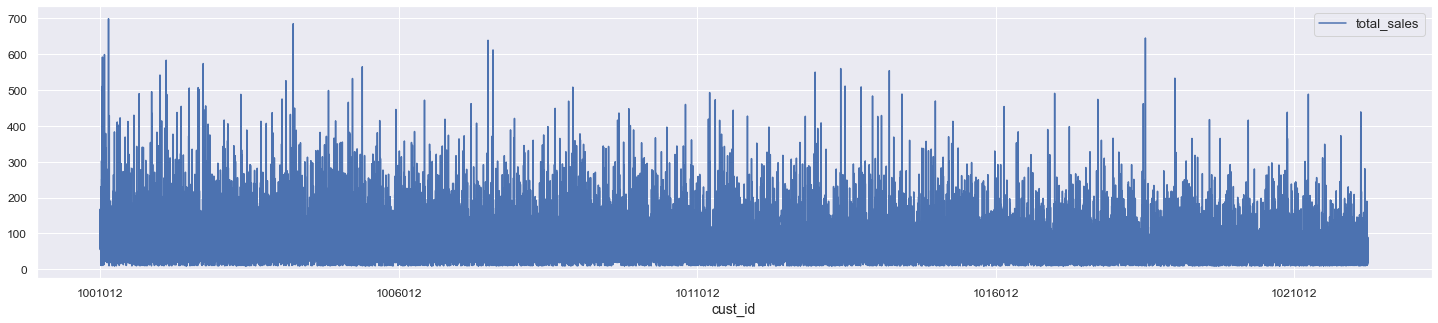

In [24]:
d3.plot(figsize=(25,5))
plt.show()

In [25]:
df.groupby(["trans_month"])["total_sales"].sum()

trans_month
1    51739.74
2    98762.99
3   198858.15
4   291358.04
5   419947.21
6   548822.73
Name: total_sales, dtype: float64

In [26]:
d4 = pd.DataFrame(df.groupby(["trans_month"])["total_sales"].sum())

In [27]:
d4.sort_values(by="total_sales")

,total_sales
trans_month,
1,51739.74
2,98762.99
3,198858.15
4,291358.04
5,419947.21
6,548822.73


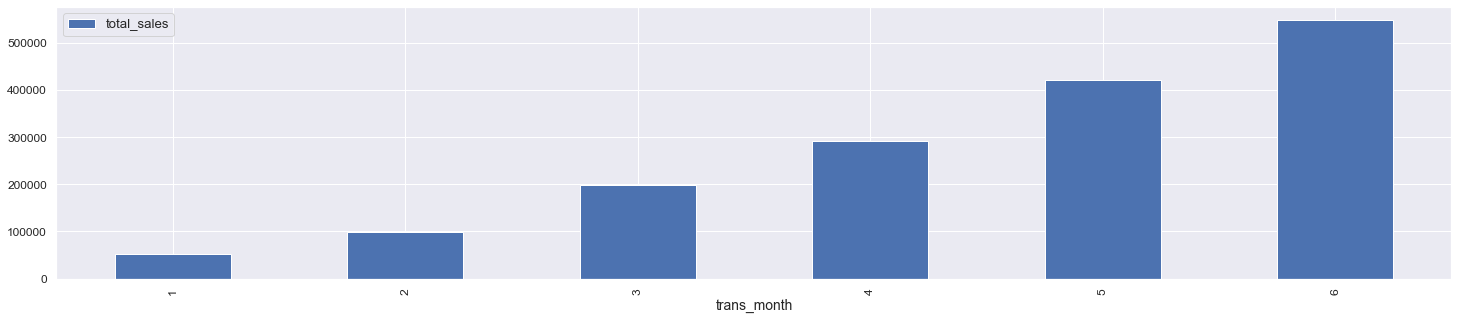

In [28]:
d4.plot(figsize=(25,5), kind='bar')
plt.show()

In [29]:
df.groupby(["trans_day"])["total_sales"].sum().head()

trans_day
1   40491.06
2   46046.35
3   45560.36
4   43896.20
5   47416.98
Name: total_sales, dtype: float64

In [30]:
d5 = pd.DataFrame(df.groupby(["trans_day"])["total_sales"].sum())

In [31]:
d5.sort_values(by="total_sales").head()

,total_sales
trans_day,
31,27025.04
1,40491.06
4,43896.20
6,45266.21
3,45560.36


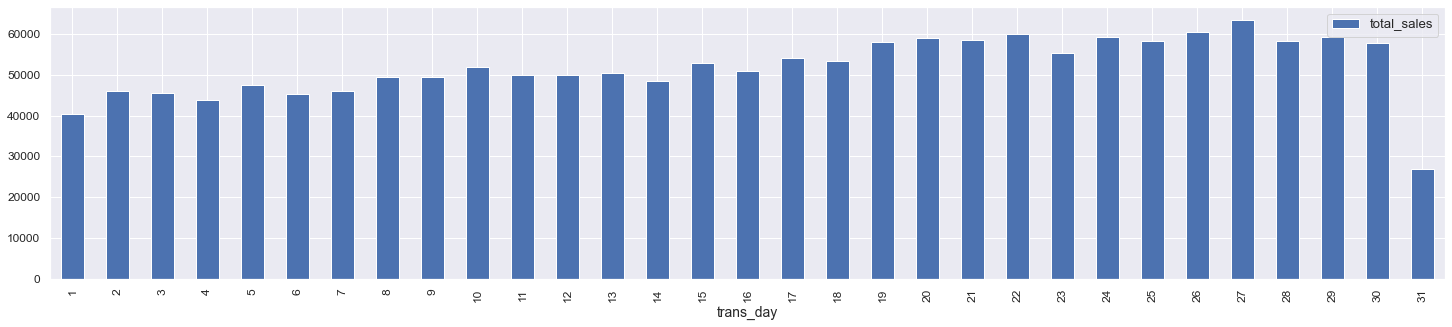

In [32]:
d5.plot(figsize=(25,5), kind='bar')
plt.show()

In [33]:
df.groupby(["cust_state"])["total_sales"].sum().head()

cust_state
Alabama      11678.81
Alaska        1046.99
Arizona      18864.32
Arkansas      6722.01
California   87512.89
Name: total_sales, dtype: float64

In [34]:
d6 = pd.DataFrame(df.groupby(["cust_state"])["total_sales"].sum())

In [35]:
d6.sort_values(by="total_sales").head()

,total_sales
cust_state,
Alaska,1046.99
Wyoming,1256.50
South Dakota,1362.68
North Dakota,1466.88
Vermont,1645.95


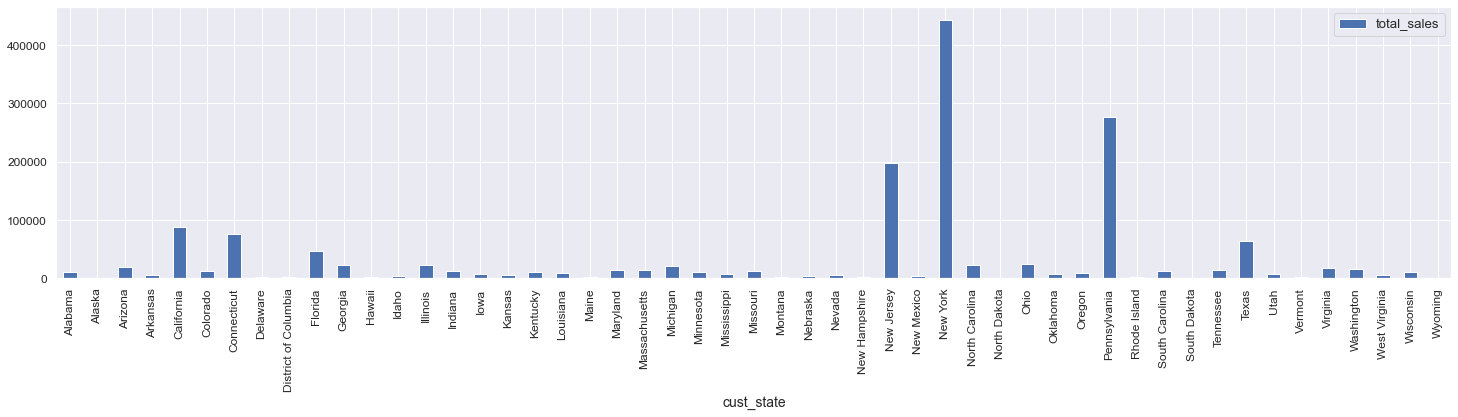

In [36]:
d6.plot(figsize=(25,5), kind='bar')
plt.show()

In [37]:
df.groupby(["prod_title"])["total_sales"].sum().head()

prod_title
All Veggie Yummies    22845.20
Ball and String       53628.25
Cat Cave             175759.92
Chewie Dental         28291.63
Chomp-a Plush         46402.30
Name: total_sales, dtype: float64

In [38]:
d7 = pd.DataFrame(df.groupby(["prod_title"])["total_sales"].sum())

In [39]:
d7.sort_values(by="total_sales")

,total_sales
prod_title,
The New Bone,13561.66
All Veggie Yummies,22845.20
Purr Mix,24369.24
Snack-em Fish,25344.15
Tug-a-Back,26484.48
Chewie Dental,28291.63
Whole Chemistry Recipe,31257.70
Chomp-a Plush,46402.30
Purrfect Puree,46484.35


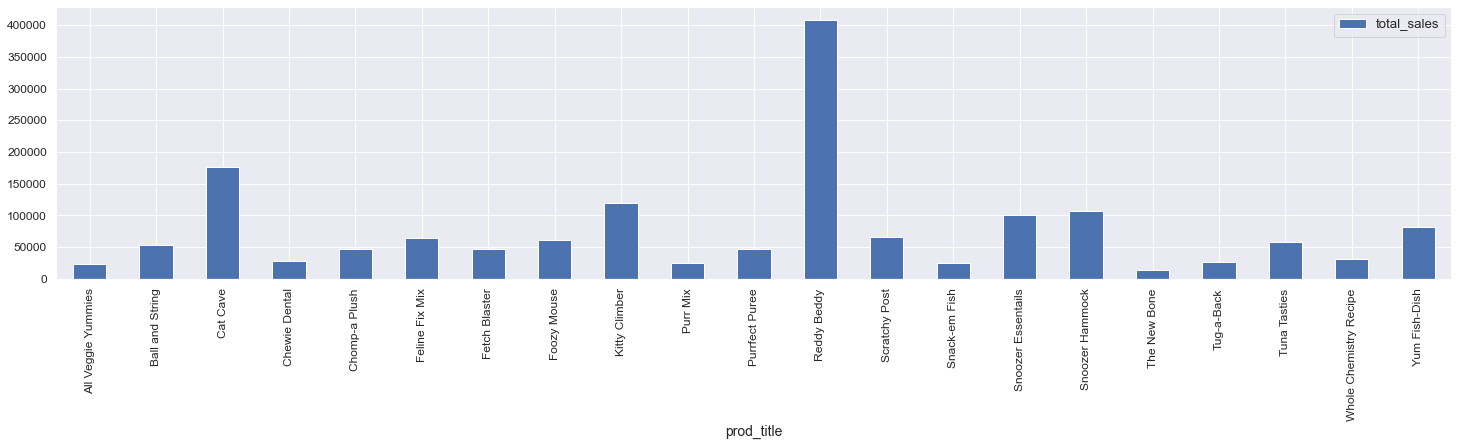

In [40]:
d7.plot(figsize=(25,5), kind='bar')
plt.show()

In [41]:
df.groupby(["prod_category"])["total_sales"].sum().head()

prod_category
bedding   790805.00
food      150635.70
toy       421092.55
treat     246955.61
Name: total_sales, dtype: float64

In [42]:
d8 = pd.DataFrame(df.groupby(["prod_category"])["total_sales"].sum())

In [43]:
d8.sort_values(by="total_sales")

,total_sales
prod_category,
food,150635.70
treat,246955.61
toy,421092.55
bedding,790805.00


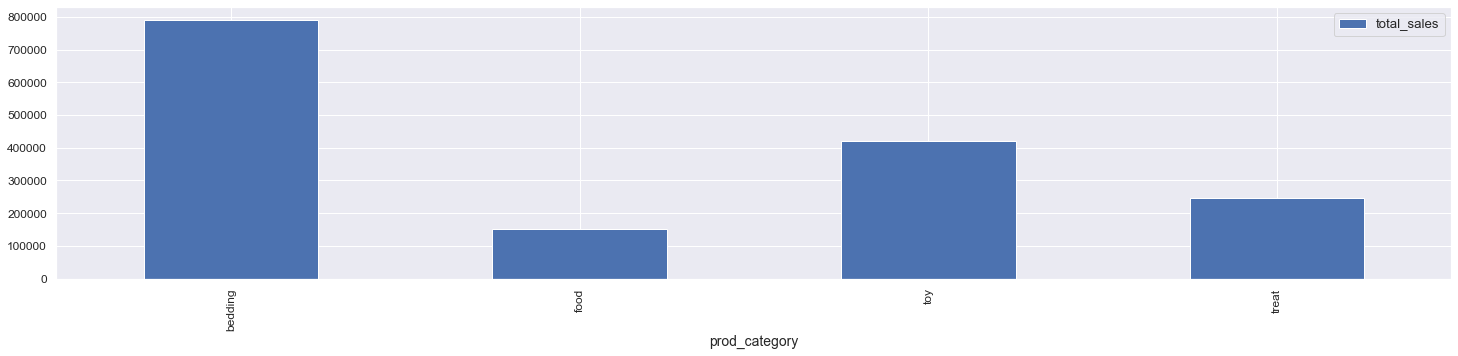

In [44]:
d8.plot(figsize=(25,5), kind="bar")
plt.show()

In [45]:
df.groupby(["prod_animal_type"])["total_sales"].sum().head()

prod_animal_type
cat   884528.60
dog   724960.26
Name: total_sales, dtype: float64

In [46]:
d9 = pd.DataFrame(df.groupby(["prod_animal_type"])["total_sales"].sum())

In [47]:
d9.sort_values(by="total_sales")

,total_sales
prod_animal_type,
dog,724960.26
cat,884528.60


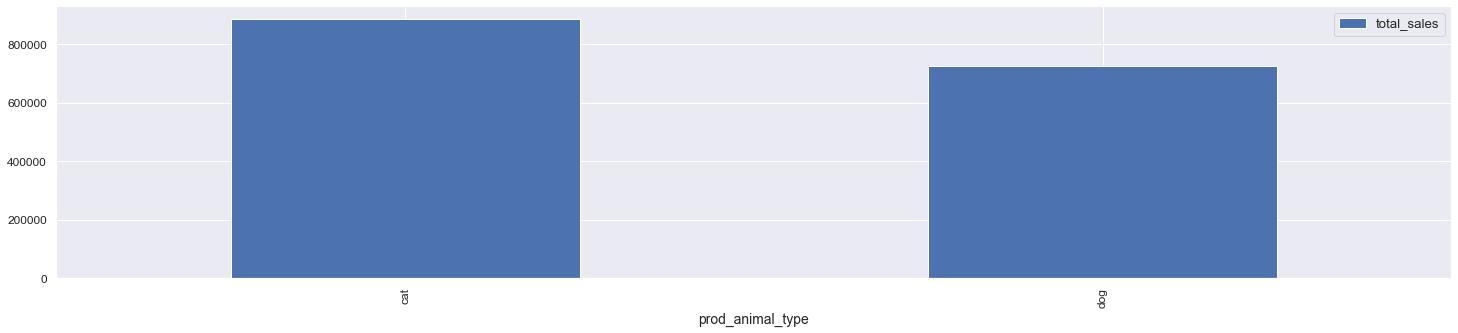

In [48]:
d9.plot(figsize=(25,5), kind='bar')
plt.show()

In [49]:
df.groupby(["date"])["total_sales"].sum().head()

date
2021-01-01    703.89
2021-01-02    810.09
2021-01-03    533.64
2021-01-04     10.97
2021-01-05   1394.20
Name: total_sales, dtype: float64

In [50]:
d10 = pd.DataFrame(df.groupby(["date"])["total_sales"].sum())

In [51]:
d10.sort_values(by="total_sales")

,total_sales
date,
2021-01-04,10.97
2021-01-11,287.62
2021-01-10,451.54
2021-01-03,533.64
2021-01-01,703.89
...,...
2021-06-26,19866.48
2021-06-29,21002.00
2021-06-30,21273.33


In [52]:
df.groupby(["trans_month"])["trans_quantity"].sum()

trans_month
1     1675
2     3227
3     6437
4     9499
5    13582
6    18109
Name: trans_quantity, dtype: int64

In [53]:
d11 = pd.DataFrame(df.groupby(["trans_month"])["trans_quantity"].sum())

In [54]:
d11.sort_values(by="trans_quantity")

,trans_quantity
trans_month,
1,1675
2,3227
3,6437
4,9499
5,13582
6,18109


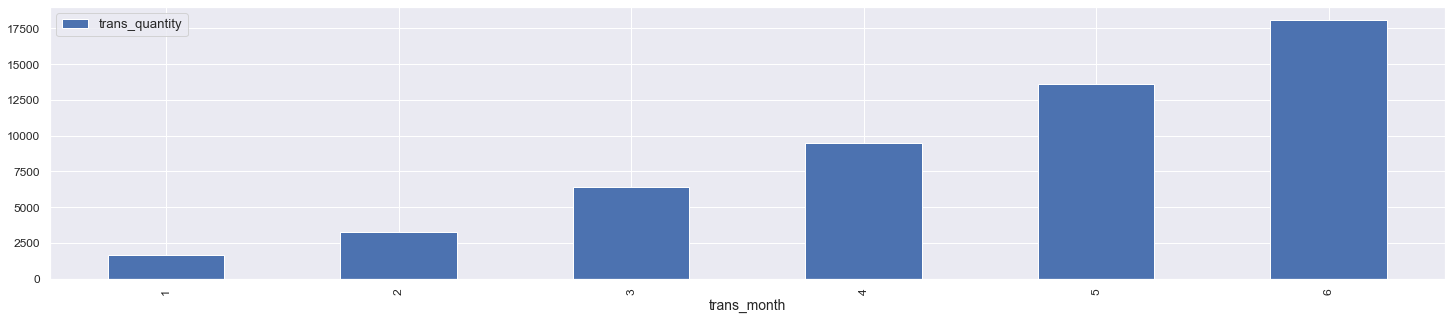

In [55]:
d11.plot(figsize=(25,5), kind='bar')
plt.show()

In [56]:
df.groupby(["trans_day"])["trans_quantity"].sum().head()

trans_day
1    1339
2    1512
3    1502
4    1431
5    1519
Name: trans_quantity, dtype: int64

In [57]:
d12 = pd.DataFrame(df.groupby(["trans_day"])["trans_quantity"].sum())

In [58]:
d12.sort_values(by="trans_quantity").head()

,trans_quantity
trans_day,
31,872
1,1339
4,1431
6,1496
3,1502


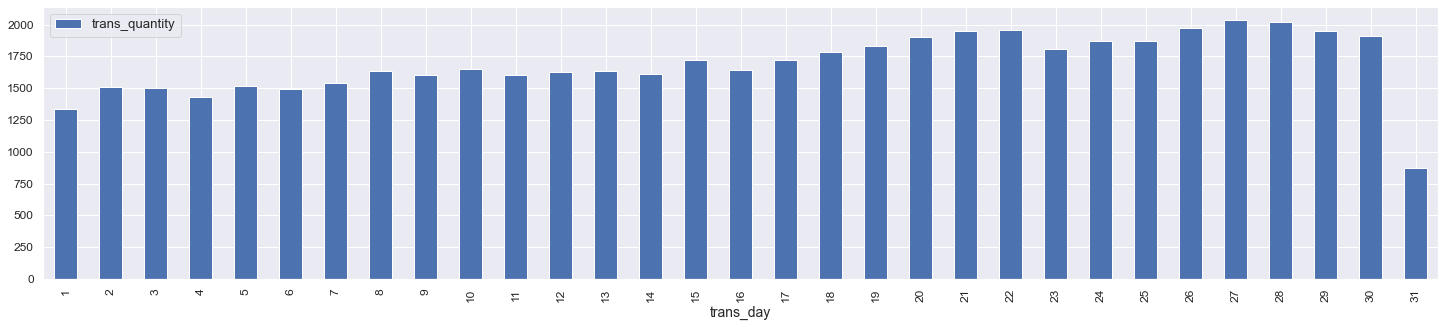

In [59]:
d12.plot(figsize=(25,5), kind='bar')
plt.show()

In [60]:
df.groupby(["cust_age"])["trans_quantity"].sum().head()

cust_age
18      15
19     333
20     951
21    1717
22    2346
Name: trans_quantity, dtype: int64

In [61]:
d13 = pd.DataFrame(df.groupby(["cust_age"])["trans_quantity"].sum())

In [62]:
d13.sort_values(by="trans_quantity").head()

,trans_quantity
cust_age,
79,1
69,1
63,8
62,8
71,10


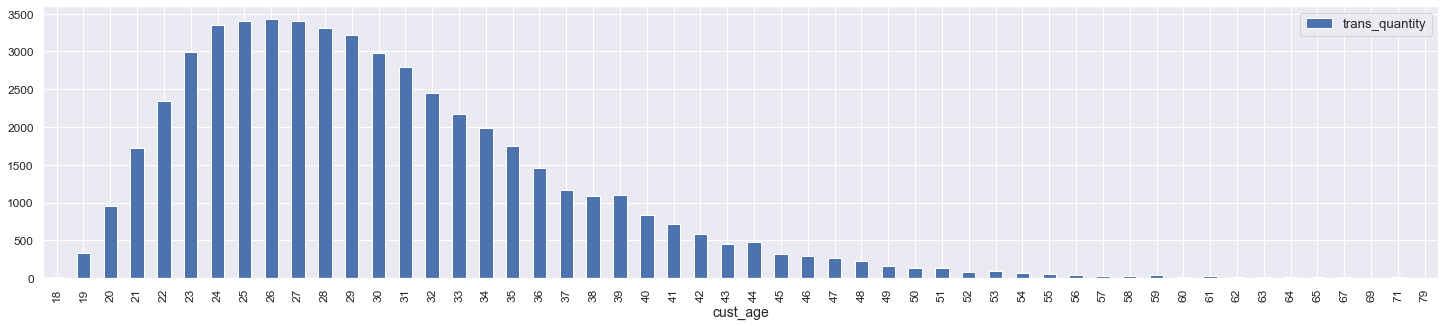

In [63]:
d13.plot(figsize=(25,5), kind='bar')
plt.show()

In [64]:
df.groupby(["cust_state"])["trans_quantity"].sum().head()

cust_state
Alabama        377
Alaska          37
Arizona        610
Arkansas       233
California    2835
Name: trans_quantity, dtype: int64

In [65]:
d14 = pd.DataFrame(df.groupby(["cust_state"])["trans_quantity"].sum())

In [66]:
d14.sort_values(by="trans_quantity").head()

,trans_quantity
cust_state,
Alaska,37
North Dakota,42
Wyoming,47
South Dakota,48
District of Columbia,51


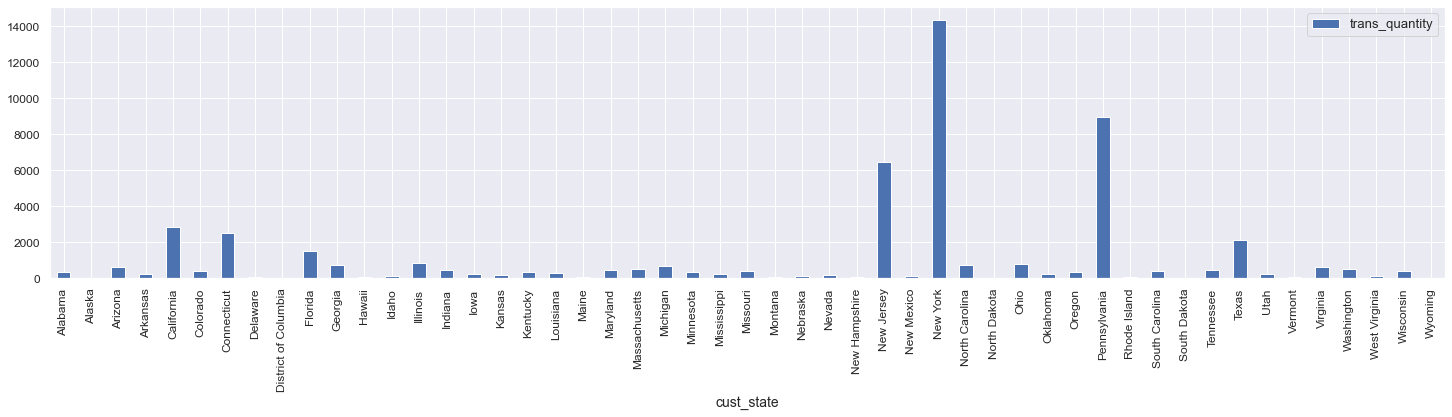

In [67]:
d14.plot(figsize=(25,5), kind='bar')
plt.show()

In [68]:
df.groupby(["prod_title"])["trans_quantity"].sum().head()

prod_title
All Veggie Yummies    2296
Ball and String       1885
Cat Cave              2408
Chewie Dental         2579
Chomp-a Plush         2114
Name: trans_quantity, dtype: int64

In [69]:
d15 = pd.DataFrame(df.groupby(["prod_title"])["trans_quantity"].sum())

In [70]:
d15.sort_values(by="trans_quantity").head()

,trans_quantity
prod_title,
Tug-a-Back,1152
The New Bone,1234
Snack-em Fish,1585
Scratchy Post,1833
Foozy Mouse,1863


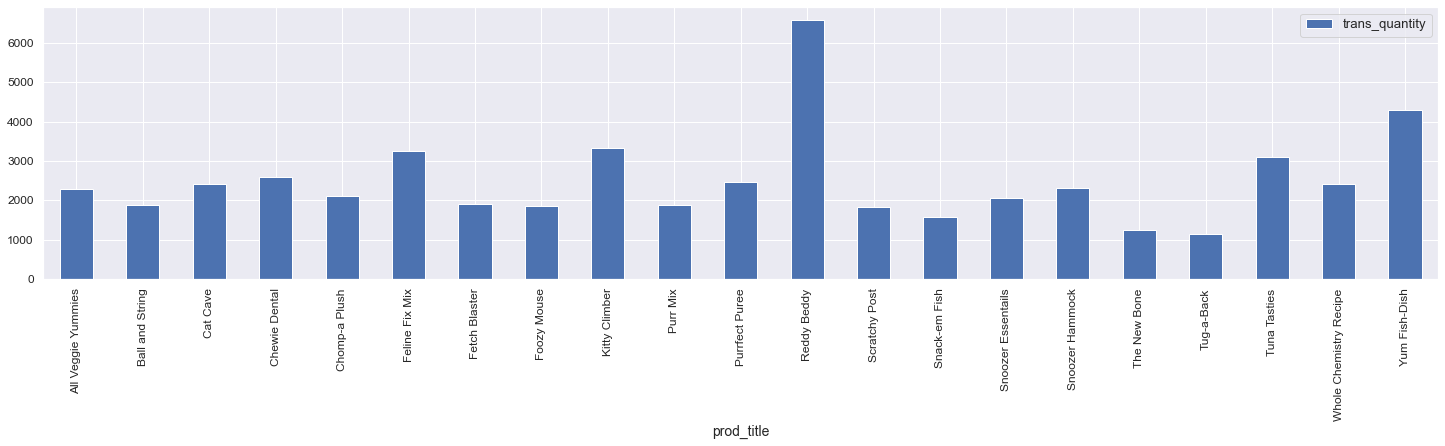

In [71]:
d15.plot(figsize=(25,5), kind='bar')
plt.show()

In [72]:
df.groupby(["prod_category"])["trans_quantity"].sum().head()

prod_category
bedding    13360
food        9818
toy        14074
treat      15277
Name: trans_quantity, dtype: int64

In [73]:
d16 = pd.DataFrame(df.groupby(["prod_category"])["trans_quantity"].sum())

In [74]:
d16.sort_values(by="trans_quantity")

,trans_quantity
prod_category,
food,9818
bedding,13360
toy,14074
treat,15277


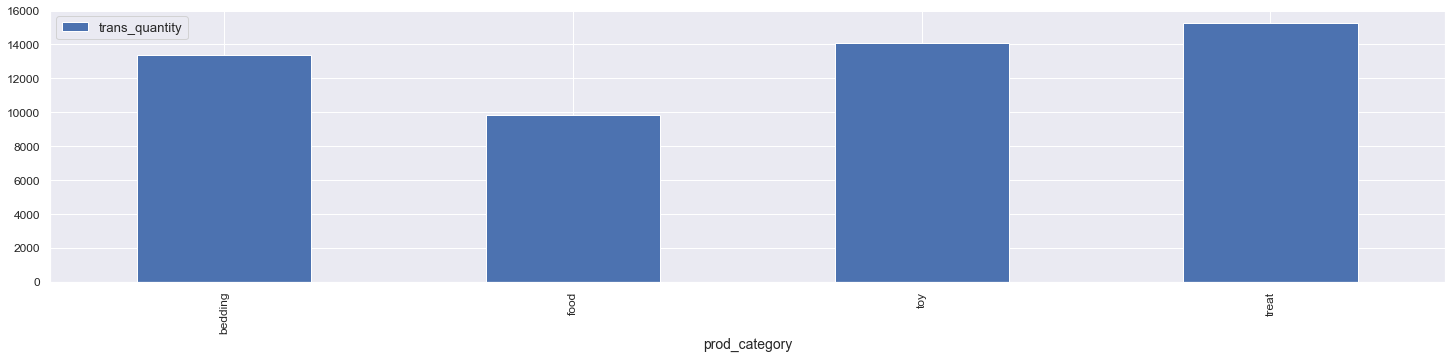

In [75]:
d16.plot(figsize=(25,5), kind='bar')
plt.show()

In [76]:
df.groupby(["prod_animal_type"])["trans_quantity"].sum().head()

prod_animal_type
cat    30205
dog    22324
Name: trans_quantity, dtype: int64

In [77]:
d17 = pd.DataFrame(df.groupby(["trans_month"])["trans_quantity"].sum())

In [78]:
d17.sort_values(by="trans_quantity")

,trans_quantity
trans_month,
1,1675
2,3227
3,6437
4,9499
5,13582
6,18109


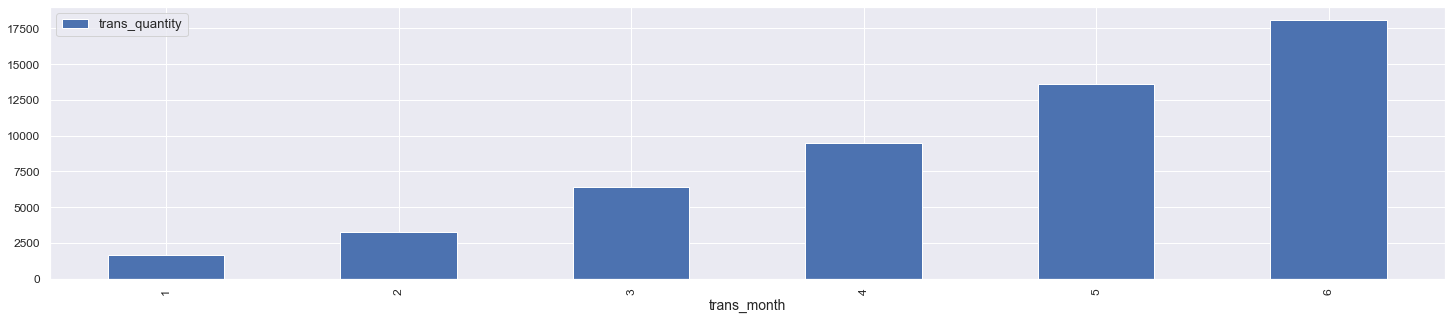

In [79]:
d17.plot(figsize=(25,5), kind='bar')
plt.show()

In [80]:
df.columns

Index(['trans_id', 'prod_upc', 'cust_id', 'trans_timestamp', 'trans_year', 'trans_month', 'trans_day', 'date', 'trans_hour', 'trans_quantity', 'cust_age', 'cust_state', 'prod_price', 'prod_title', 'prod_category', 'prod_animal_type', 'total_sales'], dtype='object')

In [81]:
df.groupby(["trans_month"])["trans_quantity"].count()

trans_month
1     1206
2     2374
3     4645
4     6884
5     9858
6    13256
Name: trans_quantity, dtype: int64

In [82]:
df.groupby(["trans_day"])["trans_quantity"].count()

trans_day
1      999
2     1104
3     1077
4     1058
5     1131
6     1117
7     1120
8     1159
9     1143
10    1179
11    1146
12    1180
13    1216
14    1202
15    1271
16    1212
17    1258
18    1272
19    1322
20    1381
21    1369
22    1429
23    1330
24    1390
25    1392
26    1450
27    1476
28    1452
29    1390
30    1376
31     622
Name: trans_quantity, dtype: int64

## Data Visualization

### Univariate Data Exploration

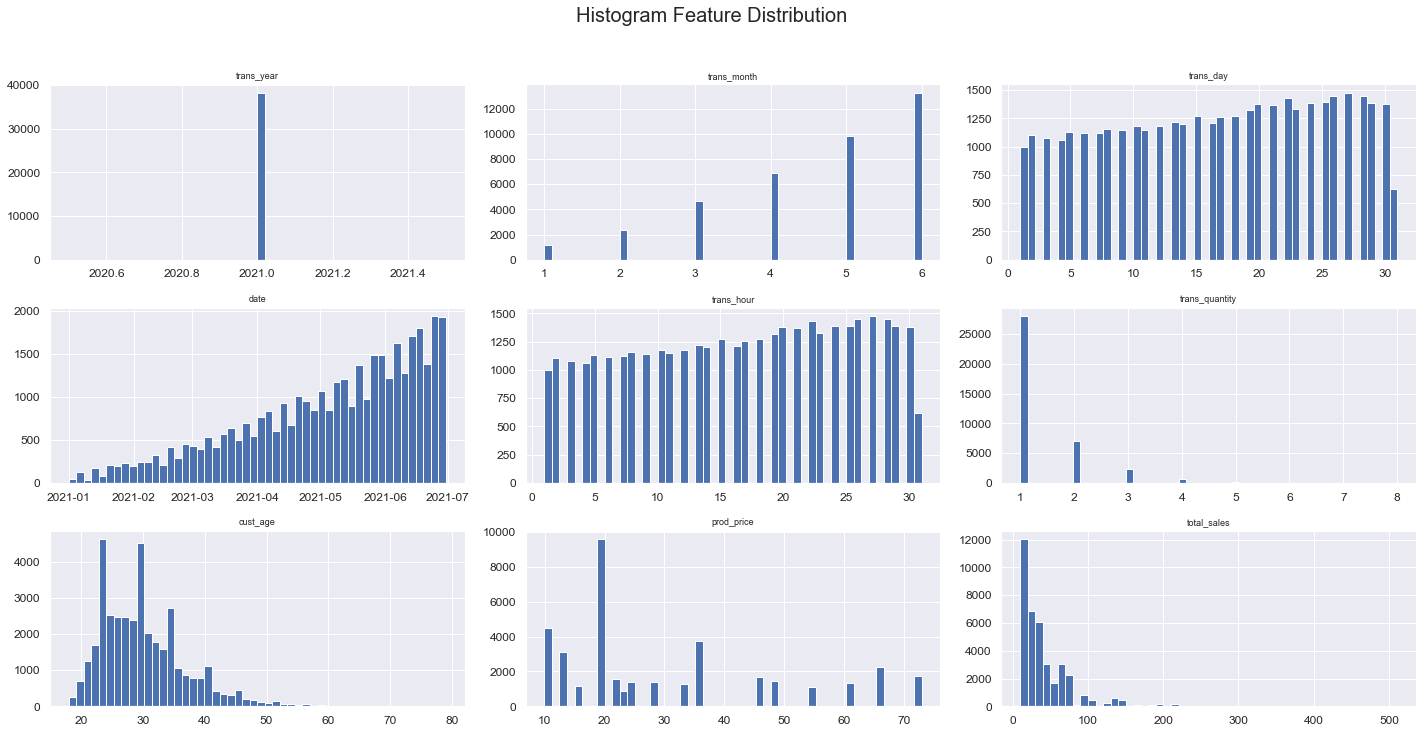

In [83]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

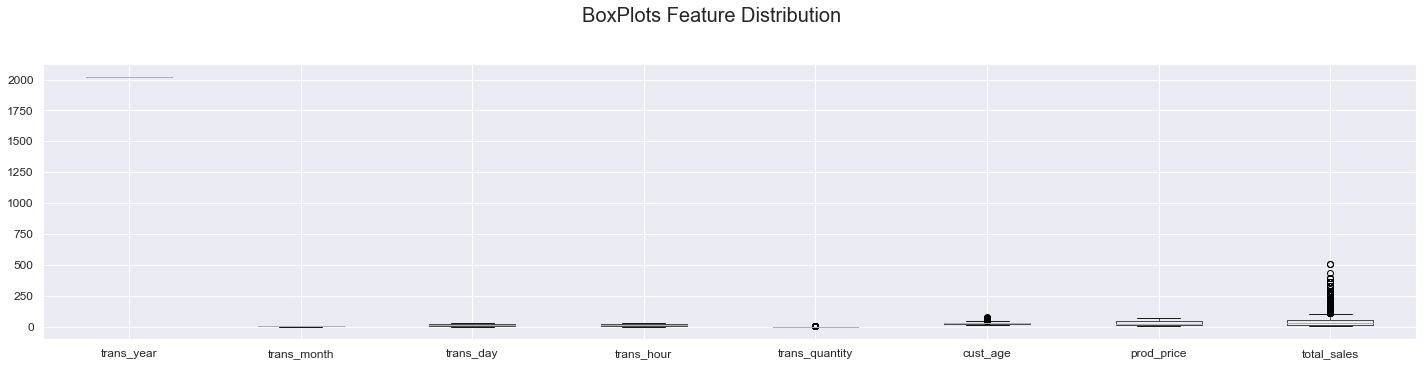

In [84]:
df.boxplot(figsize=(20,5))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

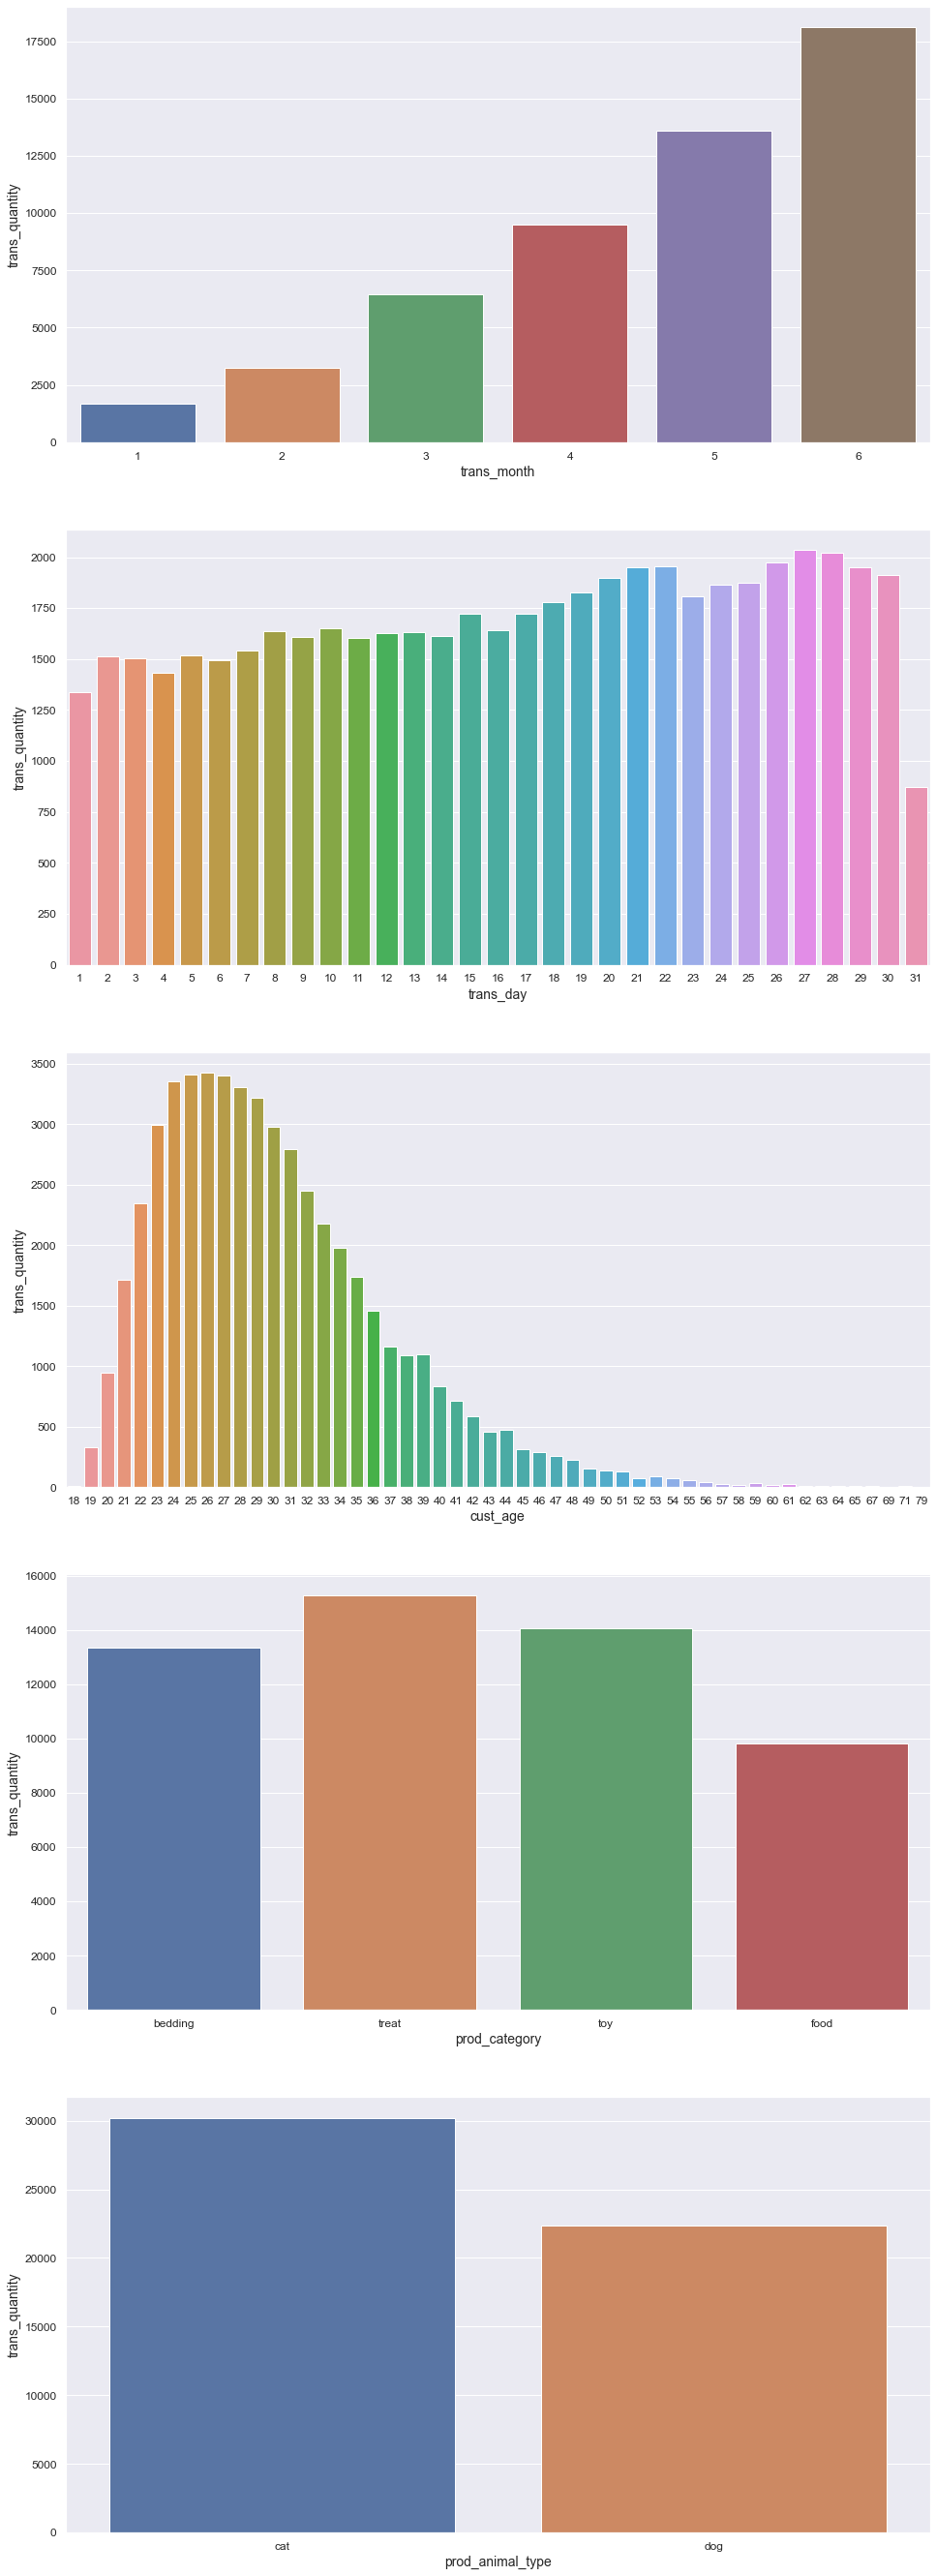

In [85]:
fig, ax = plt.subplots(5,1, sharex=False, figsize=(16,48))
#fig.suptitle('Main Title', y=0.7)


sns.barplot(x="trans_month", y="trans_quantity", data=df, ci=None, estimator=sum, ax=ax[0])
#ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)

sns.barplot(x="trans_day", y="trans_quantity", data=df, ci=None, estimator=sum, ax=ax[1])
#ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)

sns.barplot(x="cust_age", y="trans_quantity", data=df, ci=None, estimator=sum, ax=ax[2])
#ax[2].set_title('Title of the second chart')
#ax[2].tick_params('x', labelrotation=45)


sns.barplot(x="prod_category", y="trans_quantity", data=df, ci=None, estimator=sum, ax=ax[3])
#ax[3].set_title('')
#ax[3].tick_params('x', labelrotation=45)

sns.barplot(x="prod_animal_type", y="trans_quantity", data=df, ci=None, estimator=sum, ax=ax[4])
#ax[3].set_title('')
#ax[3].tick_params('x', labelrotation=45)

plt.show()

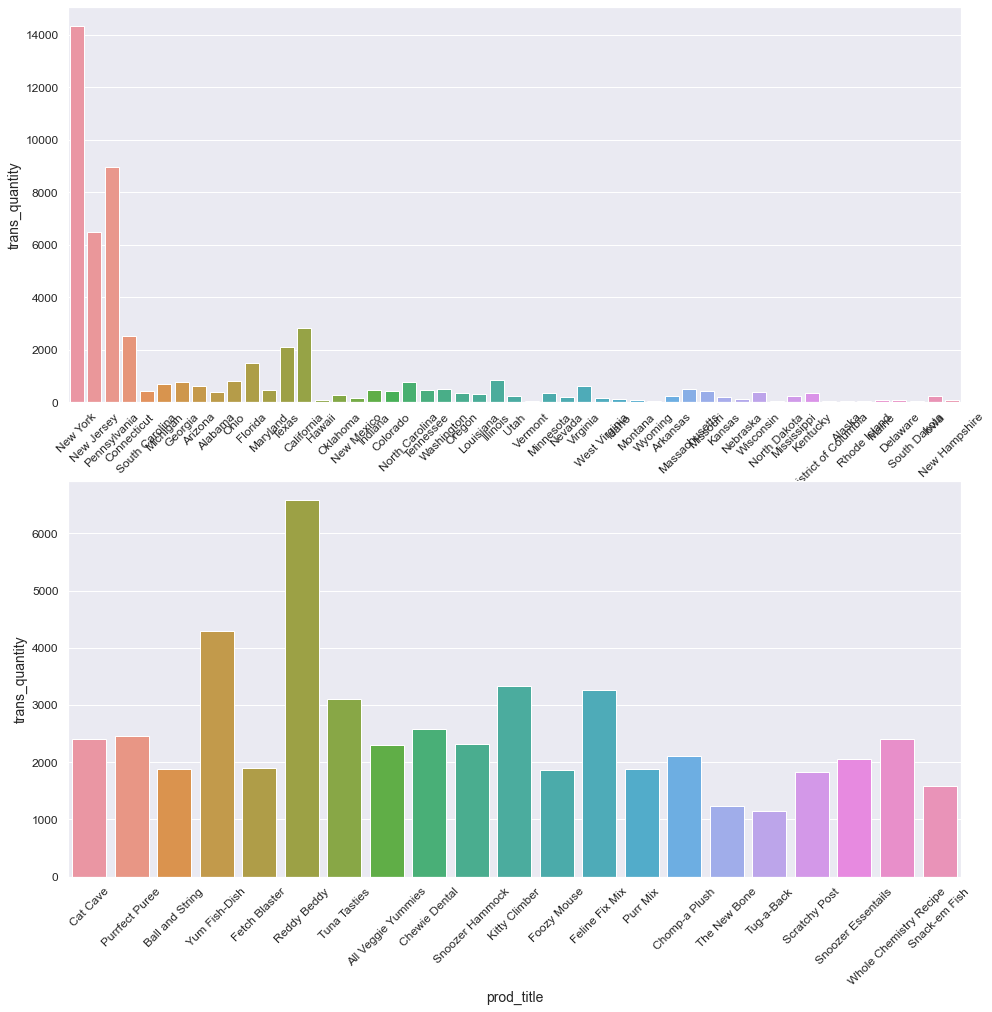

In [86]:
fig, ax = plt.subplots(2,1, sharex=False, figsize=(16,16))
#fig.suptitle('Main Title', y=0.7)


sns.barplot(x="cust_state", y="trans_quantity", data=df, ci=None, estimator=sum, ax=ax[0])
#ax[0].set_title('Title of the second chart')
ax[0].tick_params('x', labelrotation=45)

sns.barplot(x="prod_title", y="trans_quantity", data=df, ci=None, estimator=sum, ax=ax[1])
#ax[0].set_title('')
ax[1].tick_params('x', labelrotation=45)



plt.show()

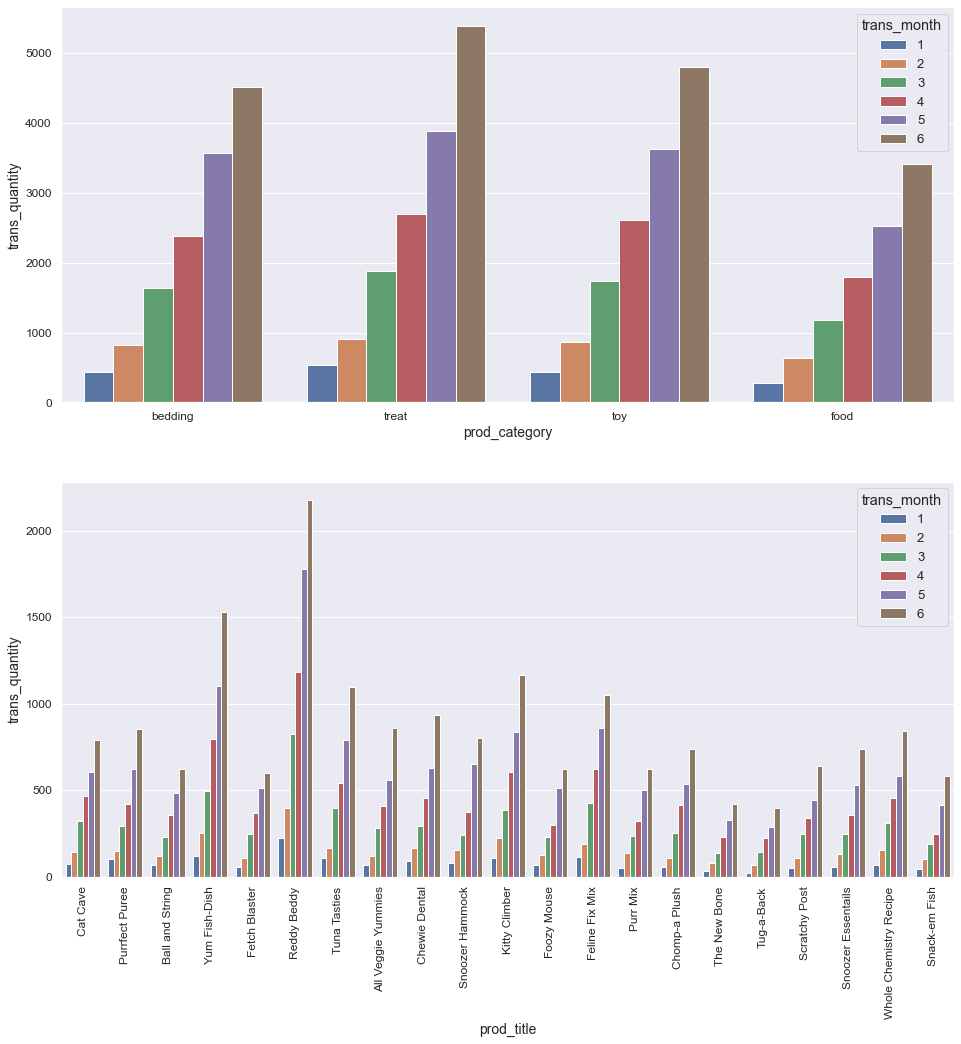

In [87]:
fig, ax = plt.subplots(2,1, sharex=False, figsize=(16,16))
#fig.suptitle('Main Title', y=0.7)


sns.barplot(x="prod_category", y="trans_quantity", hue="trans_month", data=df, ci=None, estimator=sum, ax=ax[0])
#ax[0].set_title('')
#ax[0].tick_params('x', labelrotation=45)

sns.barplot(x="prod_title", y="trans_quantity", hue="trans_month", data=df, ci=None, estimator=sum, ax=ax[1])
#ax[1].set_title('')
ax[1].tick_params('x', labelrotation=90)

plt.show()

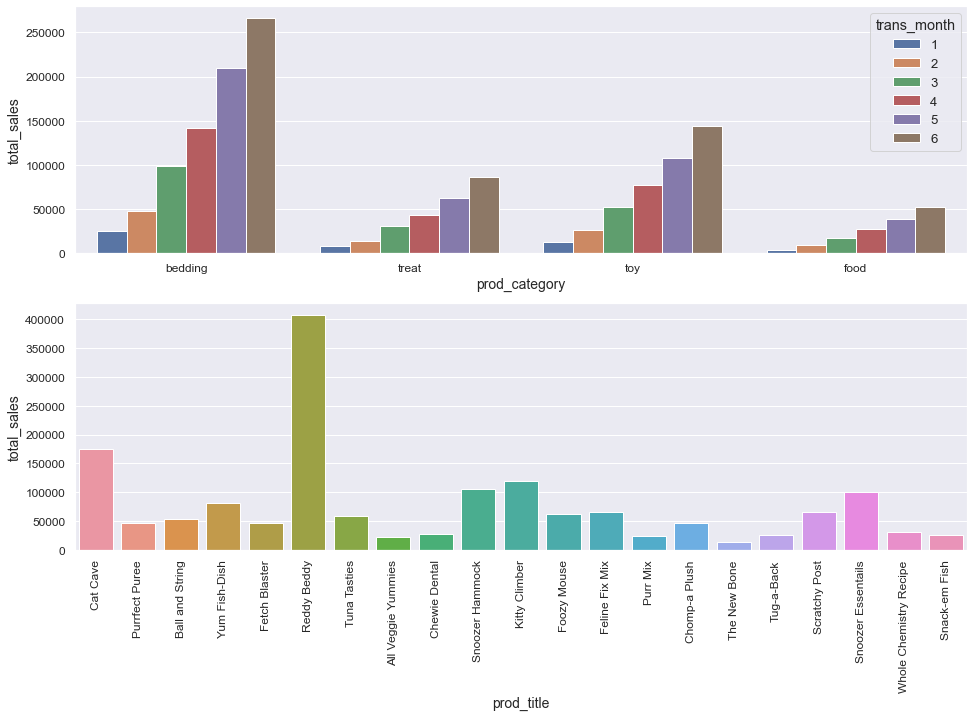

In [88]:
fig, ax = plt.subplots(2,1, sharex=False, figsize=(16,10))
#fig.suptitle('Main Title', y=0.7)


sns.barplot(x="prod_category", y="total_sales", hue="trans_month", data=df, ci=None, estimator=sum, ax=ax[0])
#ax[0].set_title('')
#ax[0].tick_params('x', labelrotation=45)

sns.barplot(x="prod_title", y="total_sales", data=df, ci=None, estimator=sum, ax=ax[1])
#ax[1].set_title('')
ax[1].tick_params('x', labelrotation=90)

plt.show()

### Time-Series Analysis

In [89]:
df.columns

Index(['trans_id', 'prod_upc', 'cust_id', 'trans_timestamp', 'trans_year', 'trans_month', 'trans_day', 'date', 'trans_hour', 'trans_quantity', 'cust_age', 'cust_state', 'prod_price', 'prod_title', 'prod_category', 'prod_animal_type', 'total_sales'], dtype='object')

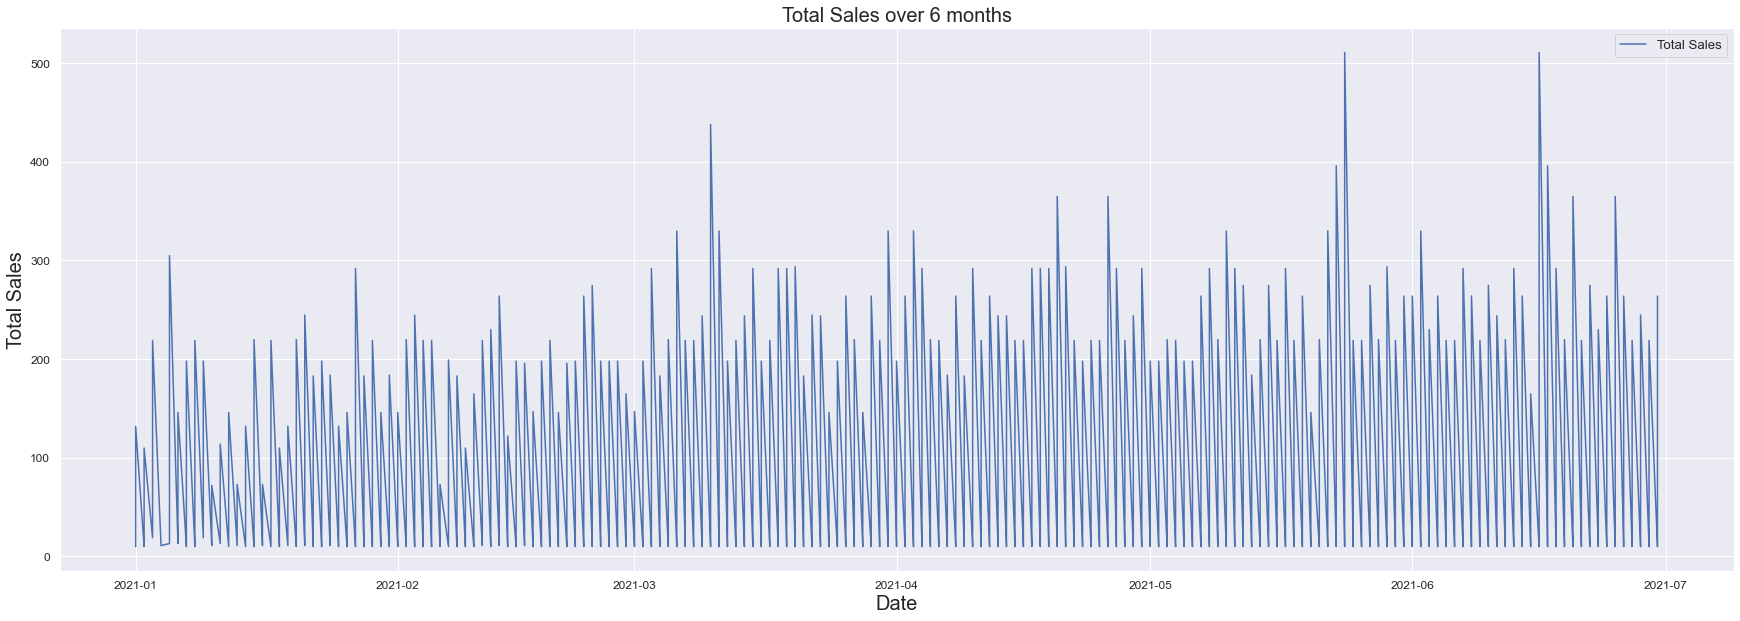

In [90]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.date,y=df.total_sales,data=df, estimator=None)
plt.title("Total Sales over 6 months", fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Total Sales", fontsize=20)
plt.legend(['Total Sales'])
plt.show()

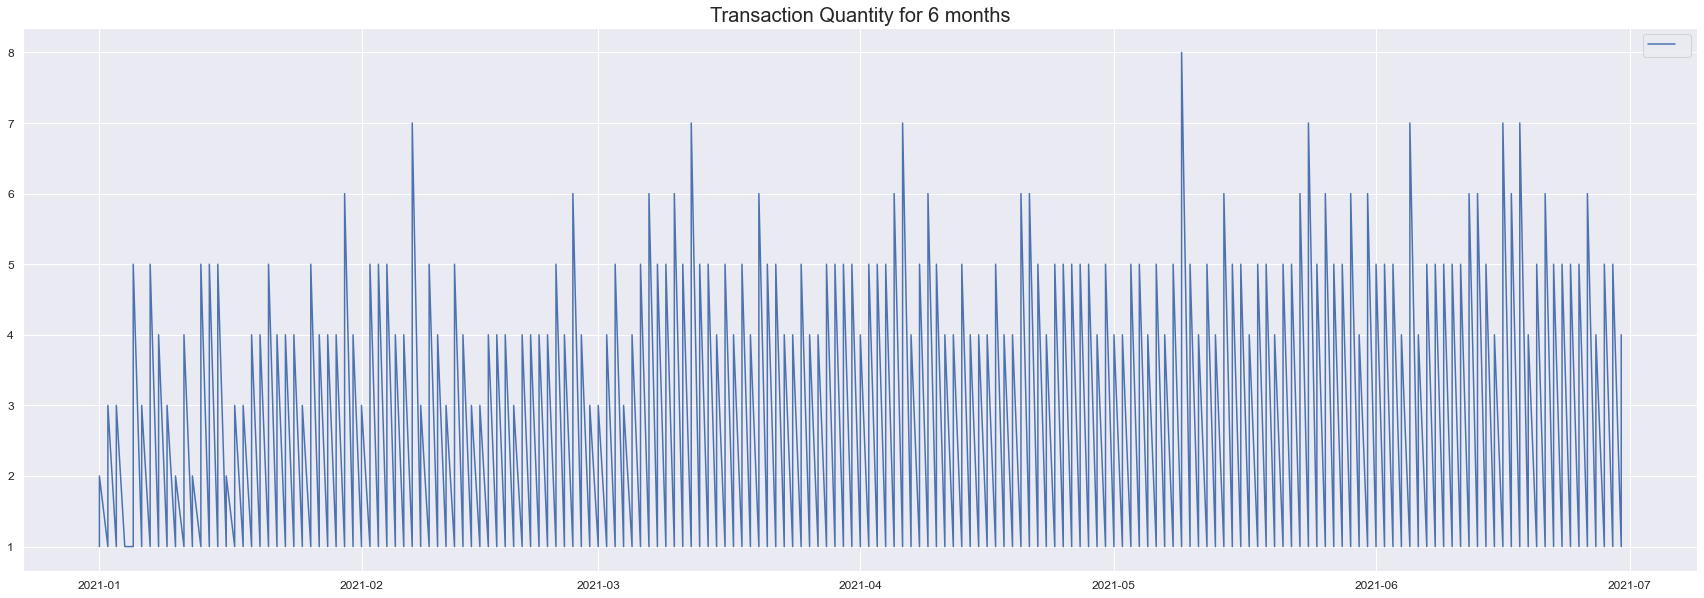

In [91]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.date,y=df.trans_quantity,data=df, estimator=None)
plt.title("Transaction Quantity for 6 months", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

In [92]:
-----------------------------------

SyntaxError: invalid syntax (<ipython-input-92-8a25a58e03f9>, line 1)

### Bivariate Data Exploration

In [ ]:
sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='kde')

sns.jointplot(x='', y='',data=df, kind='kde')

sns.jointplot(x='', y='',data=df, kind='hex')

sns.jointplot(x='', y='',data=df, kind='hex')

sns.jointplot(x='', y='',data=df, kind='reg',scatter_kws={'color':'k'},line_kws={'color':'red'})

sns.jointplot(x='', y='',data=df, kind='reg',scatter_kws={'color':'k'},line_kws={'color':'red'})

sns.lmplot(x='num_items', y='total_value', data=df, scatter_kws={'s': 1, 'alpha': 0.1}, height=5, aspect=1,
           line_kws={'lw': 2, 'color': 'red'})

sns.lmplot(x='num_items', y='total_value', data=df, scatter_kws={'s': 1, 'alpha': 0.1}, height=5, aspect=1,
           line_kws={'lw': 2, 'color': 'red'})

plt.tight_layout()
plt.show()

### Regression plot

In [ ]:
line_color = {'color': 'red'}
fig , ax = plt.subplots(2,2, figsize=(20,20))

#Feature

ax1 = sns.regplot(x=X_test.bmi, y=lr_pred, line_kws=line_color, ax=ax[0,0])
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Plot 1", size=15)

#Feature

ax2 = sns.regplot(x=X_test.s5, y=lr_pred, line_kws=line_color, ax=ax[0,1])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Plot 2", size=15)

#Feature

ax3 = sns.regplot(x=X_test.bp, y=lr_pred, line_kws=line_color, ax=ax[1,0])
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("Plot 3", size=15)

#Feature

ax4 = sns.regplot(x=X_test.s4, y=lr_pred, line_kws=line_color, ax=ax[1,1])
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax1.set_title("Plot 4", size=15)

plt.show()

### Correlation

In [ ]:
df.corr()

In [ ]:
df.corr()["target"].sort_values()

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

## Data Preprocessing

### Feature Engineering

### Drop unwanted features

In [ ]:
df.columns

In [ ]:
df.drop()

### Treat Missing Values

In [ ]:
df.isnull().sum()

In [ ]:
df[''] = df[''].replace(np.nan,df.mean())

In [ ]:
#imputer = mdi.MeanMedianImputer(imputation_method='median',variables=None)

In [ ]:
#imputer.fit(df)

In [ ]:
#df = imputer.transform(df)

In [ ]:
df.isnull().sum()

### Replacing values

In [ ]:
df.replace()

### Rounding Values

In [ ]:
###pandas.DataFrame.round
df[['internetuserate']] = df[['internetuserate']].round(decimals=0)

### Treat Duplicate Values

In [ ]:
df.duplicated(keep='first').sum()

In [ ]:
df[df.duplicated(keep=False)] #Check duplicate values

In [ ]:
df.drop_duplicates(ignore_index=True, inplace=True)

### Treat Outliers

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
#windsorizer = Winsorizer(distribution='skewed',tail='both',fold=1.5, variables=[])

In [ ]:
#windsorizer.fit(df)

In [ ]:
#df2 = windsorizer.transform(df)

In [ ]:
#df2

In [ ]:
#df2.describe()

In [ ]:
#windsorizer.left_tail_caps_

In [ ]:
#windsorizer.right_tail_caps_

### One-hot encoding

In [ ]:
df.info()

In [ ]:
df["has_gas"] = pd.get_dummies(data=df["has_gas"],drop_first=True)

### Save to CSV

In [ ]:
df.to_csv("filename.csv", index=False)

## Regression Analysis

### Linear Regression

In [ ]:
df.columns

In [ ]:
y = df['ExpirationMonth']
X = df['NumStores']

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y,X).fit()

In [ ]:
model.summary()

In [ ]:
prediction = model.predict(x)

In [ ]:
linreg = smf.ols(formula='Lottery ~ Literacy + Wealth + Region', data=df).fit()

### Residual Plots

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'x_variables', fig=fig)

### Logistic Regression

In [ ]:
y = df['ExpirationMonth']
X = df['NumStores']

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.Logit(y, X).fit()

In [ ]:
model.summary()

In [ ]:
logitfit = smf.logit(formula = 'DF ~ Debt_Service_Coverage + cash_security_to_curLiab + TNW', data = hgc).fit()

In [ ]:
logitfit = smf.logit(formula = 'DF ~ TNW + C(seg2)', data = hgcdev).fit()

#### Python code done by Dennis Lam